# KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [3]:
#init Standard Scaler
ss = StandardScaler()
#Fit & transform data to scale
X = ss.fit_transform(X)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


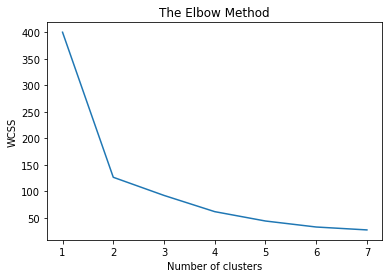

In [4]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [5]:
# Apply KMeans 
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X) #fit_predict

In [6]:
# Cluster centeriods
print (kmeans.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


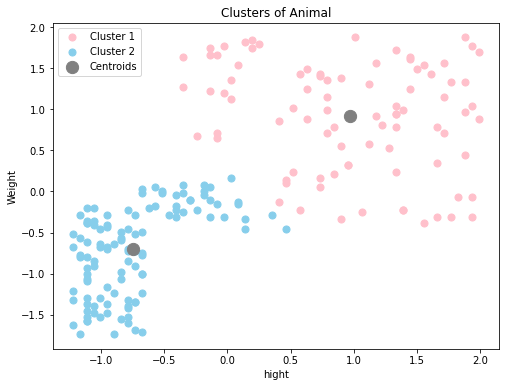

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'pink', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'skyblue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'gray', label = 'Centroids')
plt.title('Clusters of Animal')
plt.xlabel('hight')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [8]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,0
196,82.0,179.0,1.0,horse,0
197,46.0,132.0,1.0,horse,0
198,56.0,89.0,1.0,horse,1


In [9]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['kmean_prid'].replace(1,'dog',inplace=True)
df_dh['kmean_prid'].replace(0,'horse',inplace=True)

In [10]:
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,dog
1,27.0,92.0,0.0,dog,dog
2,32.0,47.0,0.0,dog,dog
3,30.0,90.0,0.0,dog,dog
4,28.0,91.0,0.0,dog,dog
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,horse
196,82.0,179.0,1.0,horse,horse
197,46.0,132.0,1.0,horse,horse
198,56.0,89.0,1.0,horse,dog


In [11]:
# Calculate the number of correct predictions
nOfCorPred = (df_dh['type'] == df_dh['kmean_prid']).value_counts()
print(nOfCorPred)

True     187
False     13
dtype: int64


In [12]:
# Compute Accuracy Score of KMean Labels with True Labels
AccuracyScore = nOfCorPred[True] / df_dh.shape[0] * 100

print("Accuracy Score:",AccuracyScore)

Accuracy Score: 93.5


# Seattle Weather KMeans Challenge

In [13]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [14]:
#init Standard Scaler
SD = StandardScaler()
#Fit & transform data to scale
X_sea = SD.fit_transform(X_sea)

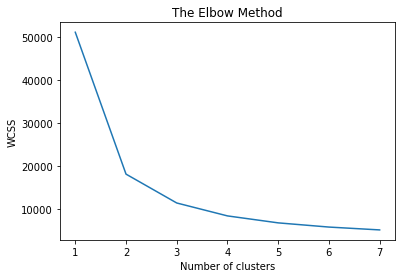

In [15]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss1 = []

for i in range(1, 8):
    kmeans_s = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_s.fit(X_sea)
    wcss1.append(kmeans_s.inertia_)
    
plt.plot(range(1, 8), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# Apply KMeans 
kmeans_s = KMeans(n_clusters = 2, init = 'k-means++',random_state = 550)

y_kmeans_s = kmeans_s.fit_predict(X_sea) #fit_predict

In [17]:
print(kmeans_s.cluster_centers_)

[[ 0.86029894  0.85349171]
 [-0.75670108 -0.75071357]]


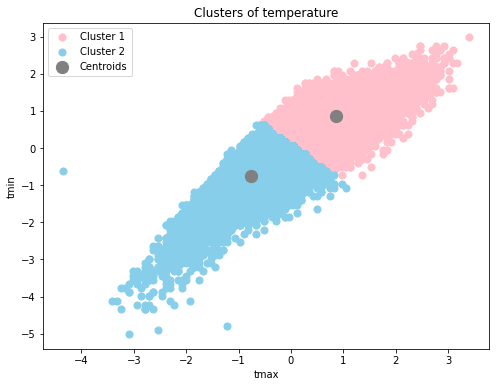

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_sea[y_kmeans_s == 0, 0], X_sea[y_kmeans_s == 0, 1], s = 50, c = 'pink', label = 'Cluster 1')

plt.scatter(X_sea[y_kmeans_s == 1, 0], X_sea[y_kmeans_s == 1, 1], s = 50, c = 'skyblue', label = 'Cluster 2')

plt.scatter(kmeans_s.cluster_centers_[:, 0], kmeans_s.cluster_centers_[:, 1], s = 150, c = 'gray', label = 'Centroids')
plt.title('Clusters of temperature')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
plt.show()

In [19]:
# assign the y_kmeans to a new column
df_sea['kmean_prid']= y_kmeans_s
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,1
25547,2017-12-11,0.00,49,29,False,1
25548,2017-12-12,0.00,46,32,False,1
25549,2017-12-13,0.00,48,34,False,1


In [20]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea['kmean_prid'].replace(0, False,inplace=True)
df_sea['kmean_prid'].replace(1, True,inplace=True)

In [21]:
# Calculate the number of correct predictions
nOfCorPred1= (df_sea['rain'] == df_sea['kmean_prid']).value_counts()
print(nOfCorPred1)

True     16266
False     9285
dtype: int64


In [22]:
# Compute Accuracy Score of KMean Labels with True Labels
Accuracy_Score= nOfCorPred1[True]/df_sea.shape[0] * 100
print(Accuracy_Score)

63.66091346718328


# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

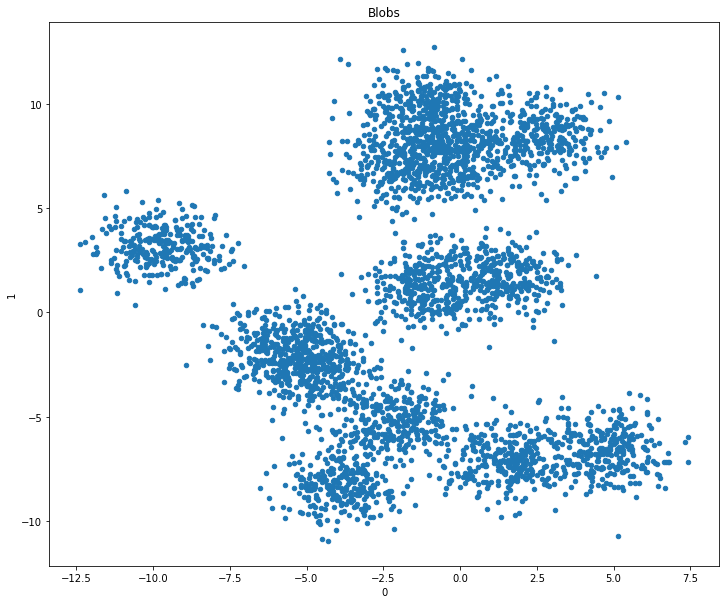

In [23]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [24]:
# Scale Data
SD1 = StandardScaler()
# Fit & transform data.
df_blob = SD1.fit_transform(df_blob)

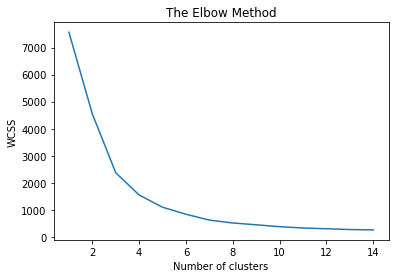

In [25]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss2 = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 
for i in range(1,15):
    km = KMeans(n_clusters=i ,init="k-means++", random_state=42)
    km.fit(df_blob)
    wcss2.append(km.inertia_)

plt.plot(range(1,15),wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Apply KMeans and Plot KMeans Results and Actual Results
km = KMeans(n_clusters=5 ,init="k-means++", random_state=42)
y_km = km.fit_predict(df_blob)

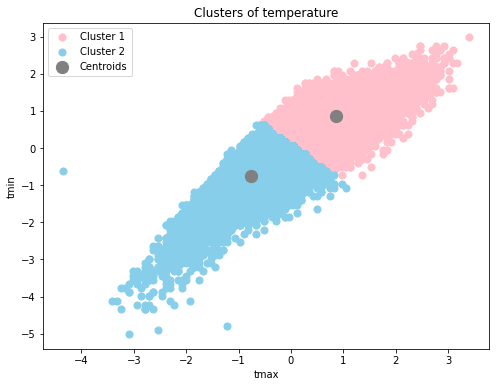

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X_sea[y_kmeans_s == 0, 0], X_sea[y_kmeans_s == 0, 1], s = 50, c = 'pink', label = 'Cluster 1')

plt.scatter(X_sea[y_kmeans_s == 1, 0], X_sea[y_kmeans_s == 1, 1], s = 50, c = 'skyblue', label = 'Cluster 2')

plt.scatter(kmeans_s.cluster_centers_[:, 0], kmeans_s.cluster_centers_[:, 1], s = 150, c = 'gray', label = 'Centroids')
plt.title('Clusters of temperature')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
plt.show()

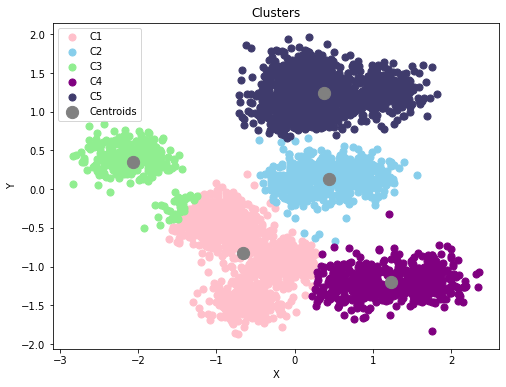

In [28]:
# Plot the clusters 
plt.figure(figsize=(8,6))
plt.scatter(df_blob[y_km == 0,0], df_blob[y_km == 0,1], s= 50 , c='pink', label='C1')
plt.scatter(df_blob[y_km == 1,0],df_blob[y_km == 1,1] ,s=50 ,c='skyblue',label='C2')
plt.scatter(df_blob[y_km == 2,0] , df_blob[y_km == 2,1], s=50, c='lightgreen' , label= 'C3')
plt.scatter(df_blob[y_km == 3,0], df_blob[y_km == 3,1], s=50, c='purple', label='C4')
plt.scatter(df_blob[y_km == 4,0], df_blob[y_km == 4,1], s=50, c='#3F3B6C', label='C5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=150, c='gray', label='Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()